First need we need to import all the relevant modules required for the EDA analysis on the Netflix dataset

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import ast


Use Pandas module to read cleaned CSV file

In [2]:
q4_df = pd.read_csv("Resources/netflix_shows.csv")
q4_df.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0


My first interest would be understand how the imdb votes are distributed.


In [3]:
#imdb votes descriptive statistics 

votes = q4_df['imdb_votes']

vm = votes.mean()
vme = votes.median()
vmo = st.mode(votes)
vmax = max(votes)
vmin = min(votes)
vstd = votes.std()

print(f"The mean of the imdb votes is {vm}")
print(f"The median of the imdb votes is {vme}")
print(f"The mode of the imdb votes is {vmo}")
print(f"The max of the imdb votes is {vmax}")
print(f"The min of the imdb votes is {vmin}")
print(f"The STD of the imdb votes is {vstd}")

The mean of the imdb votes is 19483.552095808383
The median of the imdb votes is 2114.5
The mode of the imdb votes is ModeResult(mode=6.0, count=5)
The max of the imdb votes is 1727694.0
The min of the imdb votes is 5.0
The STD of the imdb votes is 75084.34750873079


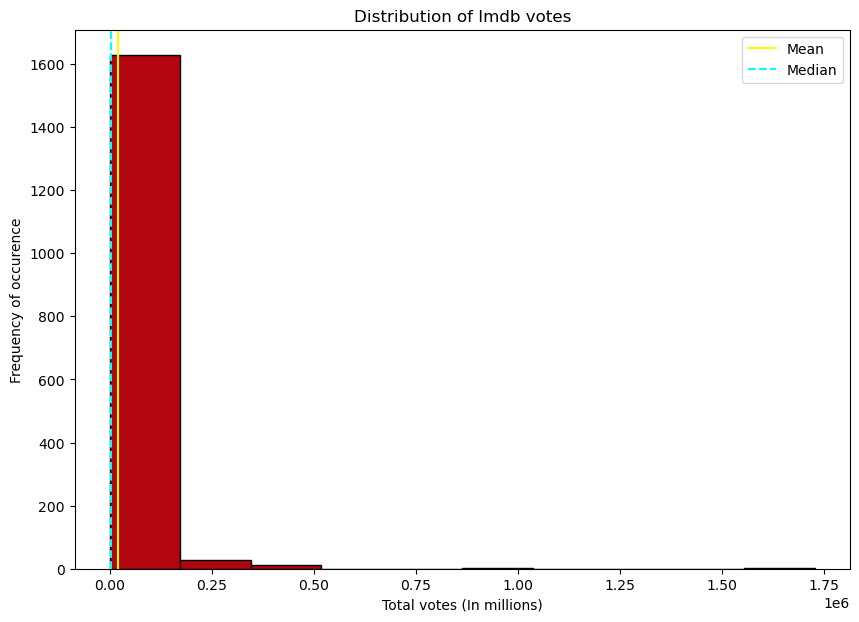

In [33]:
#Plot the imdb vote totals to see if the data is normally distributed

votes = q4_df['imdb_votes']
vh = plt.hist(votes,color='#B1060F',edgecolor='k')
plt.xlabel("Total votes (In millions)")
plt.ylabel("Frequency of occurence")
plt.axvline(vm, color='yellow',label='Mean')
plt.axvline(vme, color='cyan', linestyle='dashed',label='Median')
plt.title("Distribution of Imdb votes")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 7]
plt.savefig('Images/03_E_1_Distribution_of_imdb_votes.png')


In [7]:
print(st.normaltest(votes.sample(200)))

vpvalue = pvalue

print(f"The pvalue for the votes data is {vpvalue: .3f}, meaning our data is not normally distributed but heavily right skewed")

print(f"Based on the pvalue, we reject our null hypothesis that our data is normally distributed")

NormaltestResult(statistic=323.6559360948522, pvalue=5.236082243039647e-71)


NameError: name 'pvalue' is not defined

Plot distribution of votes on a box plot

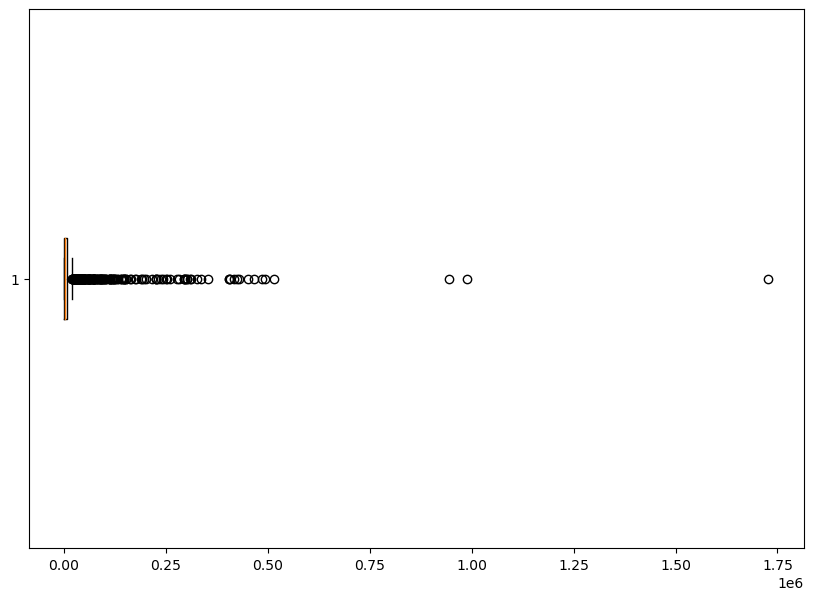

In [8]:
plt.boxplot(votes, vert=False)
plt.rcParams['figure.figsize'] = [20, 10]

In [9]:
quartiles = np.quantile(votes, [0,0.25,0.5,0.75,1])
lowerq = quartiles[1]
upperq = quartiles[2]
iqr = upperq-lowerq

print(f"The first quartile is {lowerq}")
print(f"The third quartile is {upperq}")
print(f"The IQR quartile is {iqr}")

The first quartile is 510.0
The third quartile is 2114.5
The IQR quartile is 1604.5


Based on the outcome of finding the quartiles, I will be excluding any row with a vote count of below 510. This is to ensure,
that the total votes for each show are a better representation of an overall population

As the genres column can contain multiple genres, I will extract the value that is in the first position of the list as I assume the first position is the dominate genre

In [10]:
#transform and extract first value of list
q4_df["genres_list"] = q4_df["genres"].apply(ast.literal_eval)
q4_df["genres_0"] = q4_df["genres_list"].str[0]


In [11]:
#check shape prior to manipulation 
q4_df.shape

(1670, 12)

In [12]:
#Remove and rows with a corresponding imdv votes value of <510
cq4_df = q4_df.loc[q4_df['imdb_votes'] >= 510]

#Check manipulation was succesful

cq4_df.shape

(1252, 12)

In [13]:
#view new dataframe
cq4_df.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes,genres_list,genres_0
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0,"[comedy, european]",comedy
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0,[comedy],comedy
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0,[comedy],comedy
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0,"[action, scifi, crime, drama]",action
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0,"[family, comedy, music, action, animation, fan...",family


In [14]:
#Descriptive statistics for score column in cleaned df

scores = cq4_df['imdb_score']
sm = scores.mean()
sme = scores.median()
smo = st.mode(scores)
smax = max(scores)
smin = min(scores)
sstd = scores.std()

print(f"The mean of the imdb votes is {sm}")
print(f"The median of the imdb votes is {sme}")
print(f"The mode of the imdb votes is {smo}")
print(f"The max of the imdb votes is {smax}")
print(f"The min of the imdb votes is {smin}")
print(f"The STD of the imdb votes is {sstd}")

The mean of the imdb votes is 7.18370607028754
The median of the imdb votes is 7.3
The mode of the imdb votes is ModeResult(mode=7.6, count=69)
The max of the imdb votes is 9.6
The min of the imdb votes is 1.6
The STD of the imdb votes is 1.019163935275143


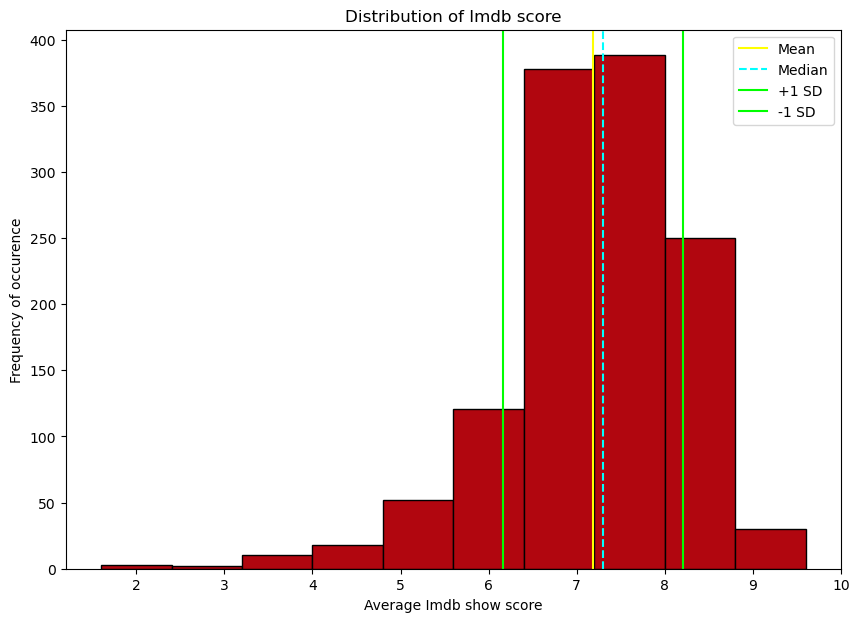

In [36]:
#Histogram distribution 
plt.hist(scores,color='#B1060F',edgecolor='k')
plt.xlabel("Average Imdb show score")
plt.ylabel("Frequency of occurence")
plt.axvline(sm, color='yellow',label='Mean')
plt.axvline(sme, color='cyan', linestyle='dashed',label='Median')
plt.axvline(sm + sstd, color='lime',label='+1 SD')
plt.axvline(sm - sstd, color='lime',label='-1 SD')
plt.title("Distribution of Imdb score")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 7]
plt.savefig('Images/03_E_2_Distribution_of_imdb_scores.png')

In [17]:
print(st.normaltest(scores.sample(200)))

print(f"The pvalue for the votes data is {pvalue: .3f}, meaning our data is not normally distributed but left skewed")

print(f"Based on the pvalue, we reject our null hypothesis that our data is normally distributed")

NormaltestResult(statistic=20.603124708004103, pvalue=3.358058941183753e-05)


NameError: name 'pvalue' is not defined

Create a scatter plot to check for any correlation between imdb votes and imdb score

the correlation coefficient between these variables is  0.254010


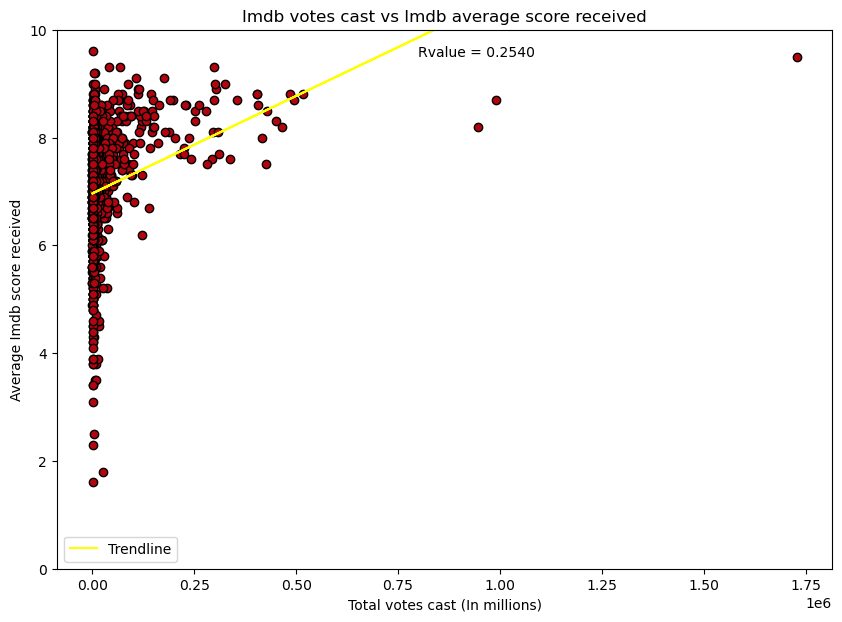

In [34]:

plt.scatter(cq4_df['imdb_votes'],cq4_df["imdb_score"],c='#B1060F',edgecolor='k');

slope, intercept, rvalue, pvalue, stderr = st.linregress(q4_df['imdb_votes'],q4_df["imdb_score"])
plt.plot(q4_df['imdb_votes'],slope*q4_df['imdb_votes']+intercept,color='yellow',label='Trendline')
plt.xlabel("Total votes cast (In millions)")
plt.ylabel("Average Imdb score received")
plt.ylim(0,10)
plt.legend()
plt.title("Imdb votes cast vs Imdb average score received")
plt.annotate("Rvalue = 0.2540", (800000,9.5))
plt.rcParams['figure.figsize'] = [10, 7]


print(f"the correlation coefficient between these variables is {rvalue: 3f}")

plt.savefig('Images/03_E_3_Scatter_of_votes_vs_scores.png')

Based on the calculated correlation coefficient, we can conclude that there is a weak positive correlation between then number of votes cast and the show rating

In [21]:
#Create a new df that counts the sum of imdb votes for each unique genres

q4_df_grb_genre =  cq4_df.groupby("genres_0")
df = q4_df_grb_genre['imdb_votes'].sum()
df = df.reset_index()
df = df.sort_values(by="imdb_votes", ascending=False)
df 


,genres_0,imdb_votes
5,drama,10242041.0
13,scifi,8635110.0
2,comedy,4244564.0
0,action,4068693.0
3,crime,2597131.0
14,thriller,795800.0
4,documentation,609675.0
15,war,486448.0
1,animation,268343.0
11,reality,251691.0


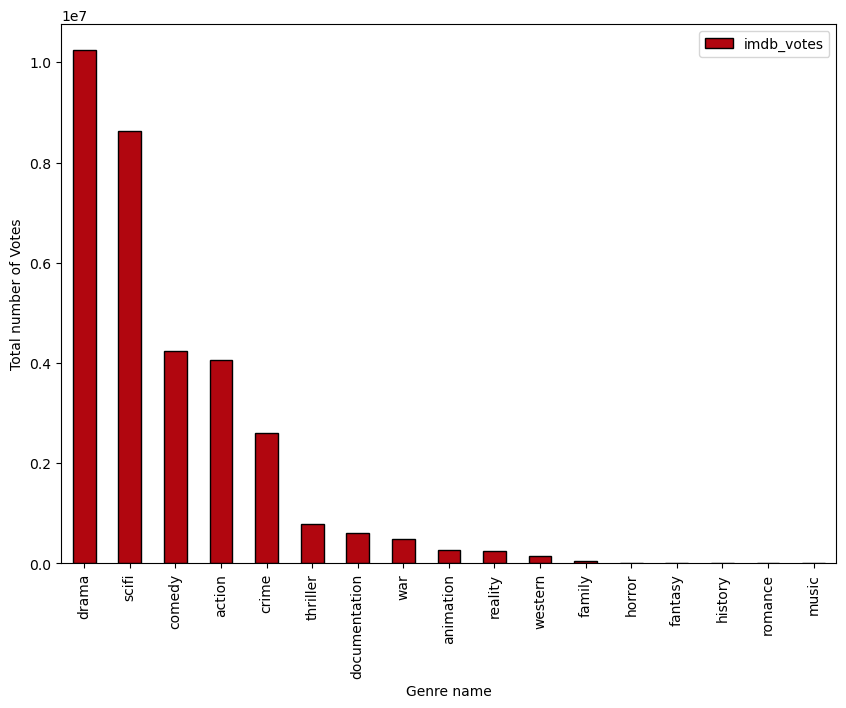

In [22]:
#Plot the total number of votes received per genre

ax = df.plot.bar(x="genres_0", y="imdb_votes",color='#B1060F',edgecolor='k')
plt.ylabel("Total number of Votes")
plt.xlabel("Genre name");
plt.rcParams['figure.figsize'] = [10, 5]
#Based on the netflix shows in this dataset, we can conclude that shows that are in the drama and/or scifi genre,
#receive alot more votes than other genres

I also want to see the current Netflix catalogue by release year


In [23]:
ry = cq4_df["release_year"].value_counts()
ry1 = ry.reset_index()
ry1 = ry1.sort_values(by='release_year', ascending=False)
ry1

,release_year,count
7,2022,55
0,2021,185
3,2020,174
1,2019,184
2,2018,183
4,2017,119
5,2016,89
6,2015,66
9,2014,29
8,2013,30


In [24]:
#Summary statistics for the count column of ry1 df
count = ry1["count"]
cm = count.mean()
cme = count.median()
cmo = st.mode(count)
cmax = max(count)
cmin = min(count)
cstd = count.std()

print(f"The mean of the imdb votes is {cm}")
print(f"The median of the imdb votes is {cme}")
print(f"The mode of the imdb votes is {cmo}")
print(f"The max of the imdb votes is {cmax}")
print(f"The min of the imdb votes is {cmin}")
print(f"The STD of the imdb votes is {cstd}")

The mean of the imdb votes is 32.1025641025641
The median of the imdb votes is 5.0
The mode of the imdb votes is ModeResult(mode=1, count=10)
The max of the imdb votes is 185
The min of the imdb votes is 1
The STD of the imdb votes is 57.16126534997505


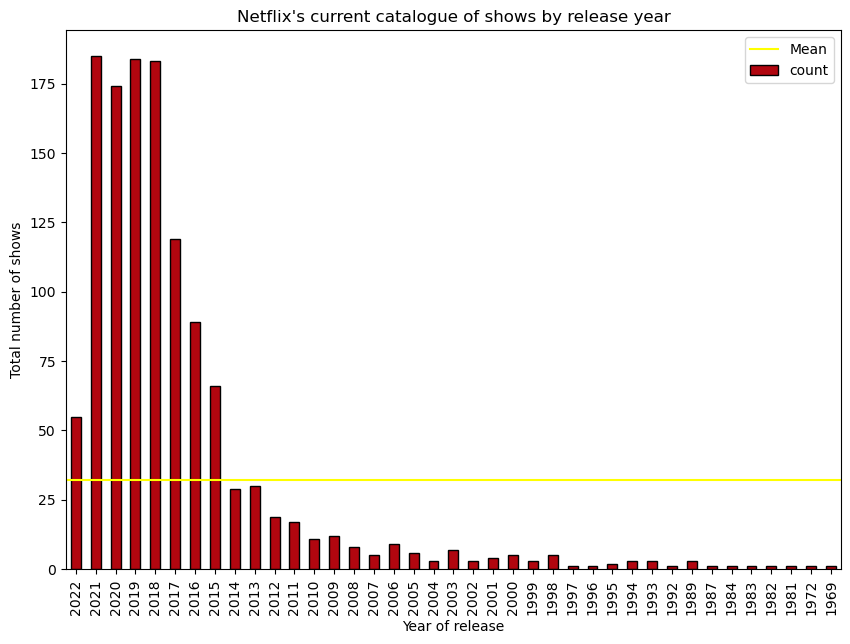

In [35]:
ar = ry1.plot.bar(x="release_year", y="count",color='#B1060F',edgecolor='k')
plt.xlabel("Year of release")
plt.ylabel("Total number of shows")
plt.axhline(cm,label='Mean',color='yellow')
plt.rcParams['figure.figsize'] = [10, 7]
plt.legend()
plt.title("Netflix's current catalogue of shows by release year")
plt.savefig('Images/03_E_4_Number_of_shows_by_year.png')
ar;

I will now create a new df to filter shows by release year and sum the number of votes received by year

In [29]:

cq4_df_grp = cq4_df.groupby("release_year")
rydf = cq4_df_grp['imdb_votes'].sum()
rydf = rydf.reset_index()
rydf = rydf.sort_values(by="release_year", ascending=False)
rydf

,release_year,imdb_votes
38,2022,381112.0
37,2021,2205562.0
36,2020,2405124.0
35,2019,2981014.0
34,2018,2603013.0
33,2017,3185795.0
32,2016,2714845.0
31,2015,2550071.0
30,2014,1596803.0
29,2013,2173287.0


In [30]:
#Summary statistics for votes column in rydf 
ryearv = rydf["imdb_votes"]
rym = ryearv.mean()
ryme = ryearv.median()
rymo = st.mode(ryearv)
rymax = max(ryearv)
rymin = min(ryearv)
rystd = ryearv.std()

print(f"The mean of the imdb votes is {rym}")
print(f"The median of the imdb votes is {ryme}")
print(f"The mode of the imdb votes is {rymo}")
print(f"The max of the imdb votes is {rymax}")
print(f"The min of the imdb votes is {rymin}")
print(f"The STD of the imdb votes is {rystd}")

The mean of the imdb votes is 832173.0256410256
The median of the imdb votes is 166053.0
The mode of the imdb votes is ModeResult(mode=1759.0, count=1)
The max of the imdb votes is 3185795.0
The min of the imdb votes is 1759.0
The STD of the imdb votes is 1034204.9509389352


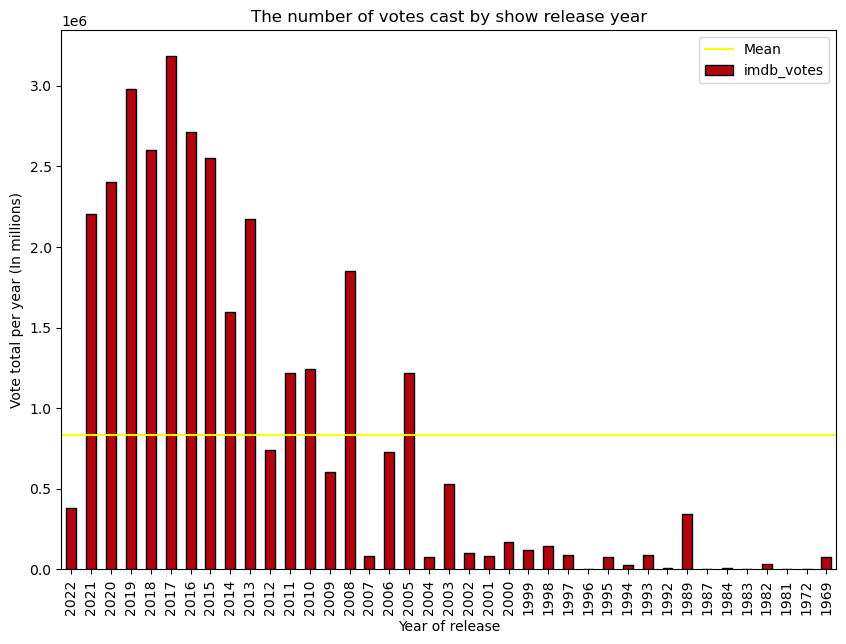

In [32]:
#create a graph showing the number imdb votes cast by each release year
at = rydf.plot.bar(x="release_year", y="imdb_votes",color='#B1060F',edgecolor='k')
plt.xlabel("Year of release")
plt.ylabel("Vote total per year (In millions)")
plt.axhline(rym,label='Mean',color='yellow')
plt.legend()
plt.title("The number of Imdb votes cast by show release year")
plt.rcParams['figure.figsize'] = [10, 7]
plt.savefig('Images/03_E_5_Number_of_votes_per_year.png')
at;